<a href="https://colab.research.google.com/github/PhilipPeprahOwusu/E.Coli-Detection-Using-Machine-Learning/blob/main/DNA_sequencing_for_Detecting_E_Coli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import pickle
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [4]:
#retrieving the data
dataUrl = 'https://archive.ics.uci.edu/ml/machine-learning-databases/molecular-biology/promoter-gene-sequences/promoters.data'
columnNames = ['Class', 'id', 'Sequence']
dna_data = pd.read_csv(dataUrl, names = columnNames)

In [5]:
dna_data.head(10)

,Class,id,Sequence
0,+,S10,\t\ttactagcaatacgcttgcgttcggtggttaagtatgtataat...
1,+,AMPC,\t\ttgctatcctgacagttgtcacgctgattggtgtcgttacaat...
2,+,AROH,\t\tgtactagagaactagtgcattagcttatttttttgttatcat...
3,+,DEOP2,\taattgtgatgtgtatcgaagtgtgttgcggagtagatgttagaa...
4,+,LEU1_TRNA,\ttcgataattaactattgacgaaaagctgaaaaccactagaatgc...
5,+,MALEFG,\taggggcaaggaggatggaaagaggttgccgtataaagaaactag...
6,+,MALK,\t\tcagggggtggaggatttaagccatctcctgatgacgcatagt...
7,+,RECA,\t\ttttctacaaaacacttgatactgtatgagcatacagtataat...
8,+,RPOB,\t\tcgacttaatatactgcgacaggacgtccgttctgtgtaaatc...
9,+,RRNAB_P1,\tttttaaatttcctcttgtcaggccggaataactccctataatgc...


In [6]:
##structuring the data
dna_classes = dna_data.loc[:, 'Class']
dna_classes.head()
print()
print(dna_classes.value_counts())


+    53
-    53
Name: Class, dtype: int64


In [7]:
#generating the DNA sequence list
dna_sequence = list(dna_data.loc[:, 'Sequence'])
dna_sequence[-1]

'\t\ttaacattaataaataaggaggctctaatggcactcattagccaatcaatcaagaact'

In [8]:
###Cleaning the data by removing the tab from the sequence
dna_dic = {}
for i, seq in enumerate(dna_sequence):
  nucleotides = list(seq)
  nucleotides = [char for char in nucleotides if char != '\t']
  nucleotides.append(dna_classes[i])

  dna_dic[i] = nucleotides

list(dna_dic[0])

['t',
 'a',
 'c',
 't',
 'a',
 'g',
 'c',
 'a',
 'a',
 't',
 'a',
 'c',
 'g',
 'c',
 't',
 't',
 'g',
 'c',
 'g',
 't',
 't',
 'c',
 'g',
 'g',
 't',
 'g',
 'g',
 't',
 't',
 'a',
 'a',
 'g',
 't',
 'a',
 't',
 'g',
 't',
 'a',
 't',
 'a',
 'a',
 't',
 'g',
 'c',
 'g',
 'c',
 'g',
 'g',
 'g',
 'c',
 't',
 't',
 'g',
 't',
 'c',
 'g',
 't',
 '+']

In [9]:
## converting dictionary object into dataframe
dna_df = pd.DataFrame(dna_dic)
#formatting the dna
dna_df = dna_df.transpose()
dna_df.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,t,a,c,t,a,g,c,a,a,t,...,g,c,t,t,g,t,c,g,t,+
1,t,g,c,t,a,t,c,c,t,g,...,c,a,t,c,g,c,c,a,a,+
2,g,t,a,c,t,a,g,a,g,a,...,c,a,c,c,c,g,g,c,g,+
3,a,a,t,t,g,t,g,a,t,g,...,a,a,c,a,a,a,c,t,c,+
4,t,c,g,a,t,a,a,t,t,a,...,c,c,g,t,g,g,t,a,g,+


In [10]:
dna_df.rename(columns={57:'Class'}, inplace = True)

In [11]:
## dropping the class column
# this is necessary because, the data will be grouped to dependent and independent variables
temp_dna = dna_df.copy(deep = True)
temp_dna = temp_dna.drop(['Class'], axis = 1)

In [12]:
##Grouping the data into categories using OneHotEncoder
dna_enc = OneHotEncoder(handle_unknown='ignore')
dna_enc.fit(temp_dna)
print(dna_enc.categories_)
final_dna_encoded1 = dna_enc.transform(temp_dna).toarray()
del temp_dna

[array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a'

In [13]:
import os
import pickle

file_path = "data/ecoli-encoder.pickle"

# Create the directory if it doesn't exist
os.makedirs(os.path.dirname(file_path), exist_ok=True)

# Save the encoder object
with open(file_path, "wb") as f:
    pickle.dump(dna_enc, f)

#print("Encoder saved successfully.")

In [14]:
final_dna_encoded = pd.DataFrame(final_dna_encoded1)
final_dna_encoded

,0,1,2,3,4,5,6,7,8,9,...,218,219,220,221,222,223,224,225,226,227
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
102,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
103,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
104,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [15]:
dna_df["Class"] = dna_df["Class"].replace(to_replace=["+"], value = 1)
dna_df["Class"] = dna_df["Class"].replace(to_replace=["-"], value = 0)
final_dna_encoded["Classes"] = dna_df["Class"]
final_dna_encoded.head()

,0,1,2,3,4,5,6,7,8,9,...,219,220,221,222,223,224,225,226,227,Classes
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1


In [16]:
##grouping encoded data to dependent independent variables
y = final_dna_encoded['Classes'].values
X = final_dna_encoded.drop(['Classes'], axis = 1).values

#defining a seed for result replication
seed = 2023

#Splittin data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state= seed)


In [17]:
dna_model = MLPClassifier(hidden_layer_sizes= (150, 100, 50), max_iter = 300, activation = 'relu', solver = 'adam', random_state = 2023)
dna_model.fit(X_train, y_train)
print(dna_model.score(X_train, y_train))

1.0


In [18]:
#predicting y for x values
y_pred = dna_model.predict(X_test)
dna_model.score(X_test, y_test)

0.8148148148148148

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.85      0.81        13
           1       0.85      0.79      0.81        14

    accuracy                           0.81        27
   macro avg       0.82      0.82      0.81        27
weighted avg       0.82      0.81      0.81        27



<Axes: >

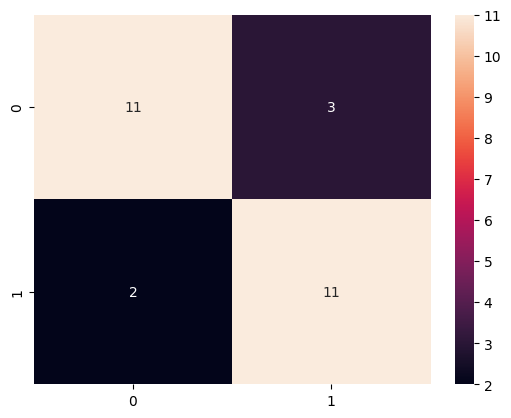

In [20]:
### comparing predicted values with actual values
conf_matrix = confusion_matrix (y_pred, y_test)
sns.heatmap(conf_matrix, annot = True)

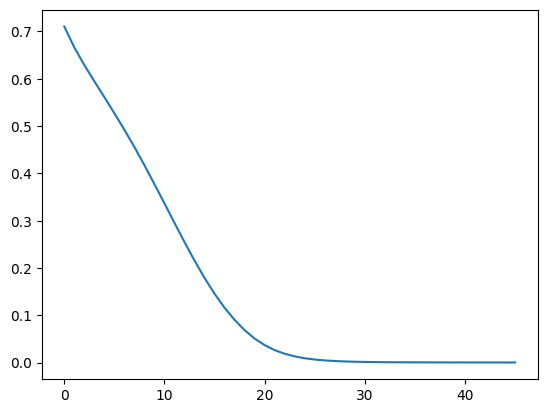

In [21]:
#building a loss curve
dna_sequence_loss = dna_model.loss_curve_
plt.plot(dna_sequence_loss)
plt.show()

In [25]:
pickle.dump(dna_model, open('/data', 'wb'))

In [26]:
genome = "ttactagcaatacgcttgcgtteggtggttaagtatgtataatgcgcgggcttgtcg"
# genome false = "ttaacattaataaataaggaggctctaatggcactcattagccaatcaatcaagaac"
genome_list = list(genome)
print(genome_list)
df_test = pd.DataFrame (genome_list)
df_test = df_test.transpose()

['t', 't', 'a', 'c', 't', 'a', 'g', 'c', 'a', 'a', 't', 'a', 'c', 'g', 'c', 't', 't', 'g', 'c', 'g', 't', 't', 'e', 'g', 'g', 't', 'g', 'g', 't', 't', 'a', 'a', 'g', 't', 'a', 't', 'g', 't', 'a', 't', 'a', 'a', 't', 'g', 'c', 'g', 'c', 'g', 'g', 'g', 'c', 't', 't', 'g', 't', 'c', 'g']


In [32]:
encoder = pickle. load(open("/content/data/ecoli-encoder.pickle",'rb'))
data_test = encoder.transform(df_test).toarray()
print(dna_model.predict(data_test))

[1]
